### Problem Statement

Fraud detection with machine learning method.
Fraud discovery is a challenging problem. The fact is that fraudulent transactions are rare; they represent a tiny fraction of a
ctivity within an organization. The challenge is that a small percentage of business can quickly turn into significant dollar lo
sses without the right tools and systems in place. As popular fraud schemes fail to pay off, fraudsters have learned to change
their tactics. The great news is that with progress in machine learning, models can learn, adjust, and reveal emerging patterns
for stopping fraud.

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

from numpy import asarray
from numpy import savetxt
from numpy import loadtxt

Using TensorFlow backend.


In [2]:
from __future__ import print_function

import numpy as np
import pandas as pd
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) 

import tensorflow as tf
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.1.0


### Reading the dataset

In [3]:
df = pd.read_csv("fraud.csv")

In [4]:
df.head(5)

,id,normalized_total_spent_last_24_hours,normalized_merchant_fraud_risk,normalized_time_since_last_transaction,normalized_average_transaction,normalized_days_till_expiration,normalized_transaction_time,normalized_change_in_merchant_sales,Amount,Class
0,0,-1.034134,-0.513680,-0.508605,-2.196179,-0.108863,-1.061009,0.285154,135.75,0
1,1,-1.265760,0.073279,1.311444,-0.734941,1.450279,-0.801969,0.860978,1.98,0
2,2,2.240560,-1.509744,-0.689632,-1.622659,-1.434514,-0.419167,-1.360193,24.00,0
3,3,-22.322051,-22.208926,-8.997418,3.396521,1.155982,-0.716039,3.832328,212.00,0
4,4,-0.522513,0.819195,1.777106,1.013636,0.306740,-0.064264,0.321084,19.99,0


In [5]:
df.tail(5)

,id,normalized_total_spent_last_24_hours,normalized_merchant_fraud_risk,normalized_time_since_last_transaction,normalized_average_transaction,normalized_days_till_expiration,normalized_transaction_time,normalized_change_in_merchant_sales,Amount,Class
9995,9995,-0.994395,1.788598,-1.405294,-0.918345,0.799028,-0.000736,0.393192,1.79,0
9996,9996,-1.823813,1.512515,2.374475,3.006943,-1.237844,0.959361,-0.646261,29.95,0
9997,9997,-1.162086,-1.330411,-1.583252,-1.885705,2.564665,-3.473247,0.881637,72.00,0
9998,9998,0.893032,-0.567744,1.226972,1.888959,-1.138383,0.386362,-0.554675,94.50,0
9999,9999,1.993109,-0.288264,-1.451488,0.105528,0.326851,-0.129957,-0.015008,32.51,0


In [6]:
df.describe()

,id,normalized_total_spent_last_24_hours,normalized_merchant_fraud_risk,normalized_time_since_last_transaction,normalized_average_transaction,normalized_days_till_expiration,normalized_transaction_time,normalized_change_in_merchant_sales,Amount,Class
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.020946,0.003546,-0.012862,-0.017475,-0.019550,-0.004823,-0.024230,85.310289,0.002000
std,2886.89568,1.941407,1.583412,1.522883,1.404262,1.312877,1.308996,1.165968,215.288621,0.044679
min,0.00000,-40.470142,-37.520432,-21.402917,-4.863246,-16.644109,-11.755878,-23.380508,0.000000,0.000000
25%,2499.75000,-0.908480,-0.598830,-0.900389,-0.853047,-0.708399,-0.760352,-0.574255,5.897500,0.000000
50%,4999.50000,0.040533,0.050037,0.168508,-0.028227,-0.065568,-0.276480,0.026643,22.895000,0.000000
75%,7499.25000,1.320048,0.794915,1.016116,0.709777,0.598068,0.392515,0.556091,77.597500,0.000000
max,9999.00000,2.385042,11.614801,3.920275,11.427809,18.254011,11.139726,17.512475,5356.420000,1.000000


In [7]:
df.shape

(10000, 10)

In [8]:
print(df.isnull().sum(axis=0))  #checking for Missing or NA values

id                                        0
normalized_total_spent_last_24_hours      0
normalized_merchant_fraud_risk            0
normalized_time_since_last_transaction    0
normalized_average_transaction            0
normalized_days_till_expiration           0
normalized_transaction_time               0
normalized_change_in_merchant_sales       0
Amount                                    0
Class                                     0
dtype: int64


In [9]:
#df.drop("id", axis = 1, inplace= True)

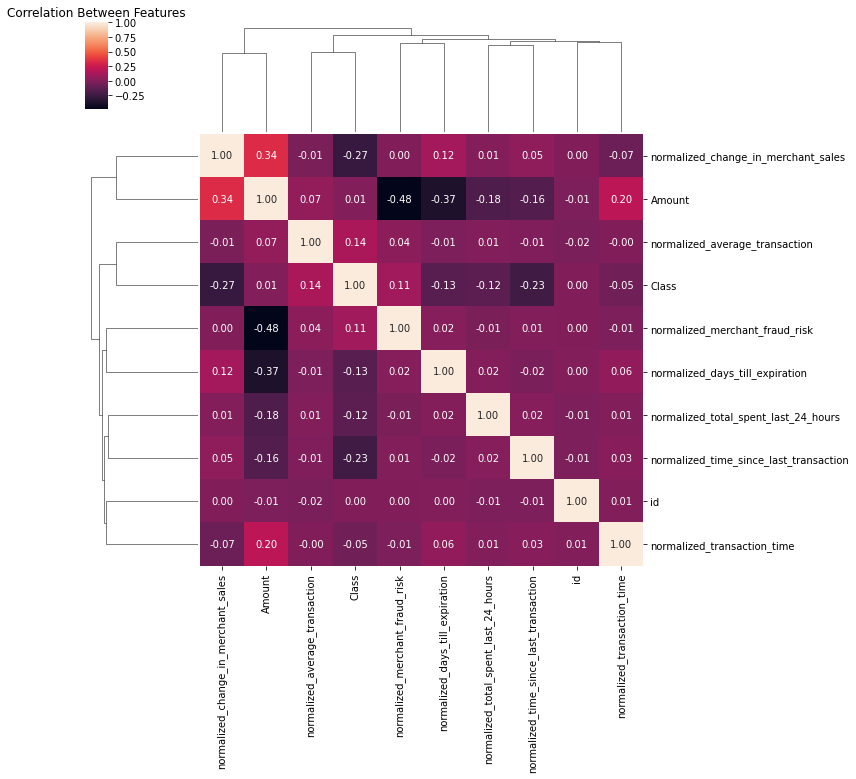

In [10]:
corr_matrix = df.corr()
colmap=sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()


0    9980
1      20
Name: Class, dtype: int64


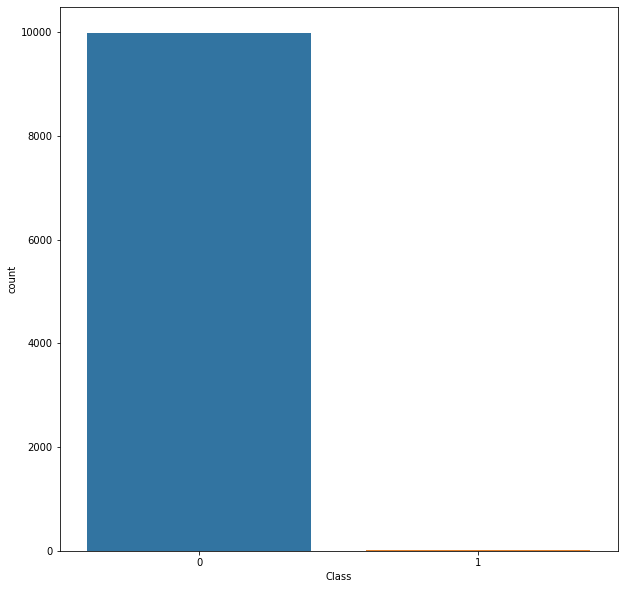

In [11]:
sns.countplot(df["Class"]); # Target variable distribution
print(df.Class.value_counts())

In [12]:
#df['Class'] = df['Class'].astype('category')

In [13]:
print((df.dtypes))

id                                          int64
normalized_total_spent_last_24_hours      float64
normalized_merchant_fraud_risk            float64
normalized_time_since_last_transaction    float64
normalized_average_transaction            float64
normalized_days_till_expiration           float64
normalized_transaction_time               float64
normalized_change_in_merchant_sales       float64
Amount                                    float64
Class                                       int64
dtype: object


In [14]:
# Train and Test Split

y = df["Class"].values
x_data=df.drop(["Class"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 9)
(2500, 9)
(7500,)
(2500,)


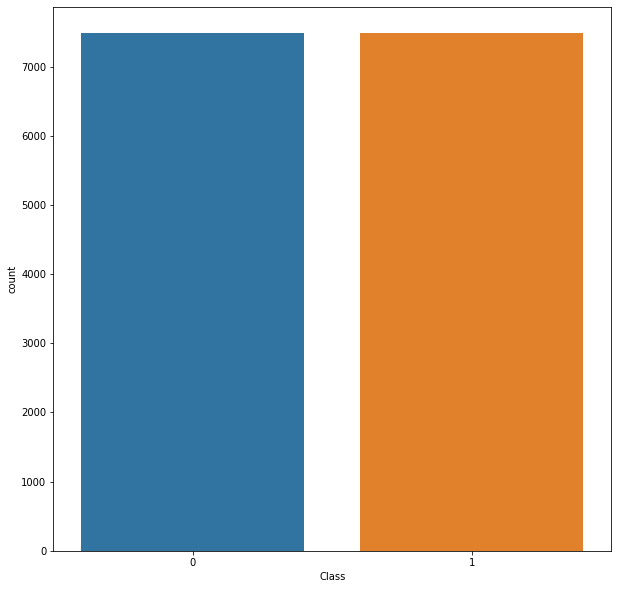

1    7486
0    7486
Name: Class, dtype: int64


In [15]:
#Handling the class imbalance using the SMOTE method

smote = SMOTE(random_state=0)


x_train,y_train=smote.fit_sample(x_train, y_train)

x_train = pd.DataFrame(data=x_train)
y_train= pd.DataFrame(data=y_train,columns=['Class'])

sns.countplot(x='Class',data=y_train)
plt.show()

# What are the counts?
print(y_train.Class.value_counts())

In [16]:
#SVM Model with slack =1 

clf_svc = SVC(kernel='linear',C=1, random_state=123)

clf_svc.fit(x_train,y_train)


train_pred = clf_svc.predict(x_train).reshape(1,-1)[0]
test_pred = clf_svc.predict(x_test).reshape(1,-1)[0]

print("Train Data:")
print("Confusion matrix Train:")
print("-----------------------")
print(metrics.confusion_matrix(y_train,train_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_train,train_pred, digits=3))

print("*******************************************************************************************************")

print("Test Data:")
print("Confusion matrix Test:")
print("----------------------")
print(metrics.confusion_matrix(y_test,test_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_test,test_pred, digits=3))


Train Data:
Confusion matrix Train:
-----------------------
[[7282  204]
 [ 222 7264]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.970     0.973     0.972      7486
           1      0.973     0.970     0.972      7486

    accuracy                          0.972     14972
   macro avg      0.972     0.972     0.972     14972
weighted avg      0.972     0.972     0.972     14972

*******************************************************************************************************
Test Data:
Confusion matrix Test:
----------------------
[[2426   68]
 [   1    5]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.973     0.986      2494
           1      0.068     0.833     0.127         6

    accuracy              

In [17]:
clf_svc3 = SVC()


svc3_param_random = {'C': [0.01, 0.1, 1], 
                  'gamma':[0, 0.0001, 0.001, 0.01], 
                 "kernel":['rbf','linear']}


svc3_random = RandomizedSearchCV(clf_svc3, param_distributions=svc3_param_random, cv=5,random_state=123)


#clf_svc2.set_params(classifier__kernel='rbf',classifier__C=1,classifier__gamma=0.001,classifier__random_state=123)

svc3_random.fit(x_train,y_train)

train_pred = svc3_random.predict(x_train).reshape(1,-1)[0]
test_pred = svc3_random.predict(x_test).reshape(1,-1)[0]

print(svc3_random.best_params_)
print("Train Data:")
print("Confusion matrix Train:")
print("-----------------------")
print(metrics.confusion_matrix(y_train,train_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_train,train_pred, digits=3))

print("*******************************************************************************************************")

print("Test Data:")
print("Confusion matrix Test:")
print("----------------------")
print(metrics.confusion_matrix(y_test,test_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_test,test_pred, digits=3))


{'kernel': 'linear', 'gamma': 0.001, 'C': 1}
Train Data:
Confusion matrix Train:
-----------------------
[[7282  204]
 [ 222 7264]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.970     0.973     0.972      7486
           1      0.973     0.970     0.972      7486

    accuracy                          0.972     14972
   macro avg      0.972     0.972     0.972     14972
weighted avg      0.972     0.972     0.972     14972

*******************************************************************************************************
Test Data:
Confusion matrix Test:
----------------------
[[2426   68]
 [   1    5]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.973     0.986      2494
           1      0.068     0.833   

In [18]:
#XG Boosting

from xgboost import XGBClassifier
clf_xg =XGBClassifier(n_estimators=500, gamma=0,learning_rate=0.1,max_depth=4)


clf_xg.fit(x_train,y_train)

train_pred = clf_xg.predict(x_train).reshape(1,-1)[0]
test_pred = clf_xg.predict(x_test).reshape(1,-1)[0]



print("Train Data:")
print("Confusion matrix Train:")
print("-----------------------")
print(metrics.confusion_matrix(y_train,train_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_train,train_pred, digits=3))

print("*******************************************************************************************************")

print("Test Data:")
print("Confusion matrix Test:")
print("----------------------")
print(metrics.confusion_matrix(y_test,test_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_test,test_pred, digits=3))

Train Data:
Confusion matrix Train:
-----------------------
[[7486    0]
 [   0 7486]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      7486
           1      1.000     1.000     1.000      7486

    accuracy                          1.000     14972
   macro avg      1.000     1.000     1.000     14972
weighted avg      1.000     1.000     1.000     14972

*******************************************************************************************************
Test Data:
Confusion matrix Test:
----------------------
[[2486    8]
 [   1    5]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.997     0.998      2494
           1      0.385     0.833     0.526         6

    accuracy              

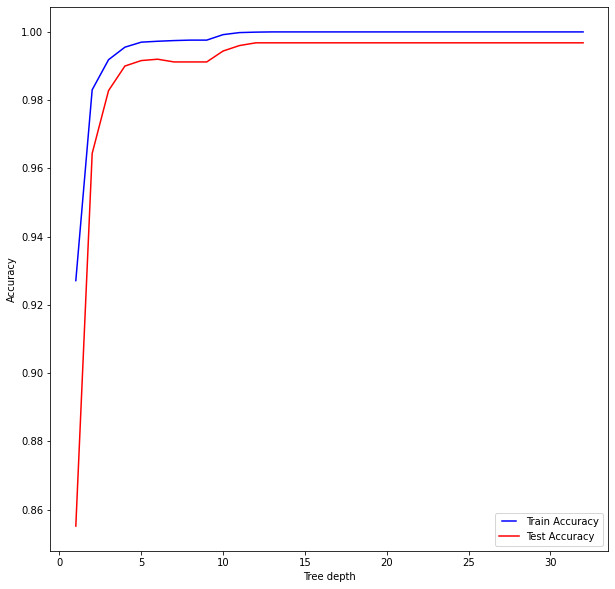

In [19]:
from sklearn import tree

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt =tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.set_params(random_state=123)
    #dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train,y_train)
    
    train_pred = dt.predict(x_train).reshape(1,-1)[0]
    confusion_matrix_train = confusion_matrix(y_train,train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    test_pred = dt.predict(x_test).reshape(1,-1)[0]
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [20]:
from sklearn import tree

clf_dt3 = tree.DecisionTreeClassifier()

clf_dt3_param_random = {'criterion': ['entropy','gini'], 
                'max_depth':[15,16,17]}


clf_dt3_random = RandomizedSearchCV(clf_dt3, param_distributions=clf_dt3_param_random,cv=5,random_state=123)


#clf_dt2.set_params(classifier__criterion ='entropy',classifier__max_depth=15,classifier__random_state=123)

clf_dt3_random.fit(x_train,y_train)


train_pred = clf_dt3_random.predict(x_train).reshape(1,-1)[0]
test_pred = clf_dt3_random.predict(x_test).reshape(1,-1)[0]


print(clf_dt3_random.best_params_)

print("Train Data:")
print("Confusion matrix Train:")
print("-----------------------")
print(metrics.confusion_matrix(y_train,train_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_train,train_pred, digits=3))

print("*******************************************************************************************************")

print("Test Data:")
print("Confusion matrix Test:")
print("----------------------")
print(metrics.confusion_matrix(y_test,test_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_test,test_pred, digits=3))

{'max_depth': 17, 'criterion': 'gini'}
Train Data:
Confusion matrix Train:
-----------------------
[[7486    0]
 [   0 7486]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      7486
           1      1.000     1.000     1.000      7486

    accuracy                          1.000     14972
   macro avg      1.000     1.000     1.000     14972
weighted avg      1.000     1.000     1.000     14972

*******************************************************************************************************
Test Data:
Confusion matrix Test:
----------------------
[[2490    4]
 [   4    2]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.998     0.998     0.998      2494
           1      0.333     0.333     0.33

###  Neural network / Deep learning models

In [21]:
# First model - Linear model

import tensorflow as tf

print('Linear model...')
input_data =  tf.keras.layers.Input(batch_shape=(None, 9), dtype='float32', name='Input_data') 

output_data =  tf.keras.layers.Dense(2, activation='softmax', name='Dense_output')(input_data)

model_1 = tf.keras.models.Model(inputs=input_data, outputs=output_data)
model_1.summary()

model_1.compile(loss='sparse_categorical_crossentropy',  optimizer='Adam', metrics=['accuracy'])

Linear model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_data (InputLayer)      [(None, 9)]               0         
_________________________________________________________________
Dense_output (Dense)         (None, 2)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_1 = model_1.fit(x_train, y_train, batch_size=128, epochs=100, verbose=2,shuffle=0, validation_data=(x_test, y_test))

Train on 14972 samples, validate on 2500 samples
Epoch 1/100
14972/14972 - 0s - loss: 0.6953 - accuracy: 0.5286 - val_loss: 0.5954 - val_accuracy: 0.9848
Epoch 2/100
14972/14972 - 0s - loss: 0.6715 - accuracy: 0.5942 - val_loss: 0.6650 - val_accuracy: 0.6912
Epoch 3/100
14972/14972 - 0s - loss: 0.6698 - accuracy: 0.6157 - val_loss: 0.6985 - val_accuracy: 0.4872
Epoch 4/100
14972/14972 - 0s - loss: 0.6671 - accuracy: 0.6137 - val_loss: 0.7120 - val_accuracy: 0.4168
Epoch 5/100
14972/14972 - 0s - loss: 0.6631 - accuracy: 0.6143 - val_loss: 0.7154 - val_accuracy: 0.3980
Epoch 6/100
14972/14972 - 0s - loss: 0.6580 - accuracy: 0.6222 - val_loss: 0.7137 - val_accuracy: 0.4112
Epoch 7/100
14972/14972 - 0s - loss: 0.6526 - accuracy: 0.6344 - val_loss: 0.7096 - val_accuracy: 0.4344
Epoch 8/100
14972/14972 - 0s - loss: 0.6470 - accuracy: 0.6477 - val_loss: 0.7044 - val_accuracy: 0.4604
Epoch 9/100
14972/14972 - 0s - loss: 0.6413 - accuracy: 0.6610 - val_loss: 0.6987 - val_accuracy: 0.4900
Epoch 

Epoch 78/100
14972/14972 - 0s - loss: 0.4150 - accuracy: 0.8893 - val_loss: 0.4545 - val_accuracy: 0.9340
Epoch 79/100
14972/14972 - 0s - loss: 0.4131 - accuracy: 0.8901 - val_loss: 0.4525 - val_accuracy: 0.9340
Epoch 80/100
14972/14972 - 0s - loss: 0.4113 - accuracy: 0.8909 - val_loss: 0.4506 - val_accuracy: 0.9340
Epoch 81/100
14972/14972 - 0s - loss: 0.4095 - accuracy: 0.8921 - val_loss: 0.4486 - val_accuracy: 0.9344
Epoch 82/100
14972/14972 - 0s - loss: 0.4077 - accuracy: 0.8931 - val_loss: 0.4467 - val_accuracy: 0.9348
Epoch 83/100
14972/14972 - 0s - loss: 0.4059 - accuracy: 0.8937 - val_loss: 0.4448 - val_accuracy: 0.9352
Epoch 84/100
14972/14972 - 0s - loss: 0.4041 - accuracy: 0.8943 - val_loss: 0.4430 - val_accuracy: 0.9352
Epoch 85/100
14972/14972 - 0s - loss: 0.4024 - accuracy: 0.8947 - val_loss: 0.4411 - val_accuracy: 0.9352
Epoch 86/100
14972/14972 - 0s - loss: 0.4007 - accuracy: 0.8952 - val_loss: 0.4393 - val_accuracy: 0.9352
Epoch 87/100
14972/14972 - 0s - loss: 0.3990 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


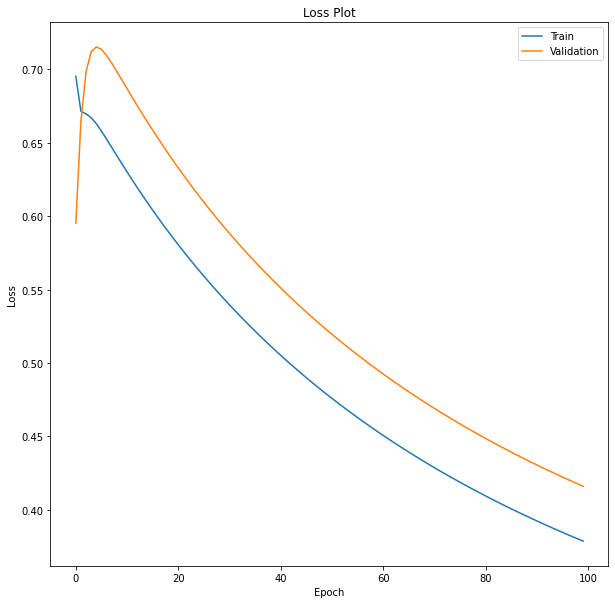

In [23]:
print(history_1.history.keys())
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [24]:
# Predicting the Model
test_pred = model_1.predict(x_test)
train_pred = model_1.predict(x_train)

test_pred = np.argmax(test_pred, axis=1)
train_pred = np.argmax(train_pred, axis=1)



In [25]:
print("Train Data:")
print("Confusion matrix Train:")
print("-----------------------")
print(metrics.confusion_matrix(y_train,train_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_train,train_pred, digits=3))

print("*******************************************************************************************************")

print("Test Data:")
print("Confusion matrix Test:")
print("----------------------")
print(metrics.confusion_matrix(y_test,test_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_test,test_pred, digits=3))

Train Data:
Confusion matrix Train:
-----------------------
[[7036  450]
 [ 439 7047]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.941     0.940     0.941      7486
           1      0.940     0.941     0.941      7486

    accuracy                          0.941     14972
   macro avg      0.941     0.941     0.941     14972
weighted avg      0.941     0.941     0.941     14972

*******************************************************************************************************
Test Data:
Confusion matrix Test:
----------------------
[[2336  158]
 [   1    5]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.937     0.967      2494
           1      0.031     0.833     0.059         6

    accuracy              

In [39]:
# Second model - Deep nn model
print('dense 1 model...')
input_data = tf.keras.layers.Input(batch_shape=(None, 9), dtype='float32', name='Input_data') 

dense1  = tf.keras.layers.Dense(128, activation='relu', name='Dense_layer_1')(input_data)
dense2  = tf.keras.layers.Dense(256, activation='relu', name='Dense_layer_2')(dense1)
dense3  = tf.keras.layers.Dense(128, activation='relu', name='Dense_layer_3')(dense2)    

output_data = tf.keras.layers.Dense(2, activation='softmax', name='Dense_output')(dense3)

# Model Architecture defined
model_2 = tf.keras.models.Model(inputs=input_data, outputs=output_data)
model_2.summary()
model_2.compile(loss='sparse_categorical_crossentropy',  optimizer='Adam', metrics=['accuracy'])

dense 1 model...
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_data (InputLayer)      [(None, 9)]               0         
_________________________________________________________________
Dense_layer_1 (Dense)        (None, 128)               1280      
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 256)               33024     
_________________________________________________________________
Dense_layer_3 (Dense)        (None, 128)               32896     
_________________________________________________________________
Dense_output (Dense)         (None, 2)                 258       
Total params: 67,458
Trainable params: 67,458
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Train the model
history_2 = model_2.fit(x_train, y_train, batch_size=128, epochs=100, verbose=2,shuffle=0, validation_data=(x_test, y_test))

Train on 14972 samples, validate on 2500 samples
Epoch 1/100
14972/14972 - 0s - loss: 0.4258 - accuracy: 0.8916 - val_loss: 8.3502 - val_accuracy: 0.0024
Epoch 2/100
14972/14972 - 0s - loss: 1.2242 - accuracy: 0.6131 - val_loss: 4.5058 - val_accuracy: 0.0024
Epoch 3/100
14972/14972 - 0s - loss: 0.9376 - accuracy: 0.6188 - val_loss: 5.8079 - val_accuracy: 0.0024
Epoch 4/100
14972/14972 - 0s - loss: 0.9298 - accuracy: 0.6326 - val_loss: 2.7521 - val_accuracy: 0.0024
Epoch 5/100
14972/14972 - 0s - loss: 0.7296 - accuracy: 0.6858 - val_loss: 4.2302 - val_accuracy: 0.0024
Epoch 6/100
14972/14972 - 0s - loss: 0.8119 - accuracy: 0.5999 - val_loss: 0.9464 - val_accuracy: 0.0024
Epoch 7/100
14972/14972 - 0s - loss: 0.4724 - accuracy: 0.7034 - val_loss: 4.2682 - val_accuracy: 0.0024
Epoch 8/100
14972/14972 - 0s - loss: 0.7218 - accuracy: 0.7481 - val_loss: 3.2353 - val_accuracy: 0.0024
Epoch 9/100
14972/14972 - 0s - loss: 0.6605 - accuracy: 0.7162 - val_loss: 3.2455 - val_accuracy: 0.0024
Epoch 

Epoch 78/100
14972/14972 - 0s - loss: 0.2406 - accuracy: 0.9007 - val_loss: 0.9148 - val_accuracy: 0.6328
Epoch 79/100
14972/14972 - 0s - loss: 0.2039 - accuracy: 0.9226 - val_loss: 0.7758 - val_accuracy: 0.6952
Epoch 80/100
14972/14972 - 0s - loss: 0.1831 - accuracy: 0.9327 - val_loss: 0.8520 - val_accuracy: 0.6576
Epoch 81/100
14972/14972 - 0s - loss: 0.1904 - accuracy: 0.9267 - val_loss: 0.7881 - val_accuracy: 0.6908
Epoch 82/100
14972/14972 - 0s - loss: 0.1820 - accuracy: 0.9293 - val_loss: 0.8132 - val_accuracy: 0.6748
Epoch 83/100
14972/14972 - 0s - loss: 0.1779 - accuracy: 0.9325 - val_loss: 0.8464 - val_accuracy: 0.6588
Epoch 84/100
14972/14972 - 0s - loss: 0.1871 - accuracy: 0.9275 - val_loss: 0.7957 - val_accuracy: 0.6828
Epoch 85/100
14972/14972 - 0s - loss: 0.1807 - accuracy: 0.9293 - val_loss: 0.8040 - val_accuracy: 0.6796
Epoch 86/100
14972/14972 - 0s - loss: 0.1793 - accuracy: 0.9307 - val_loss: 0.8250 - val_accuracy: 0.6660
Epoch 87/100
14972/14972 - 0s - loss: 0.1791 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


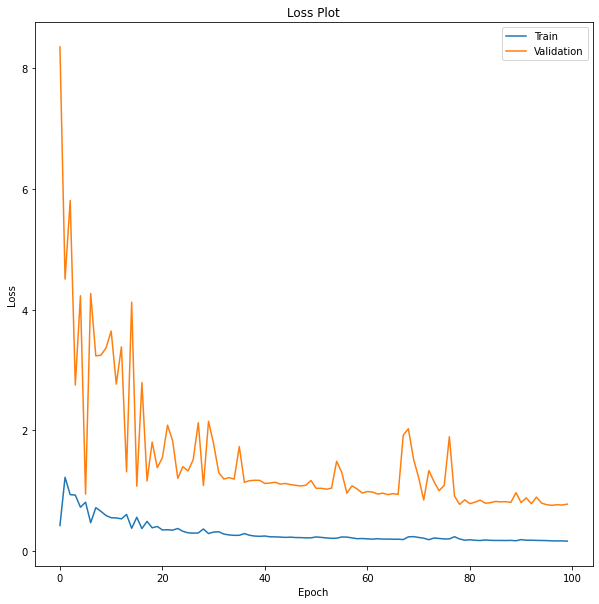

In [41]:
print(history_2.history.keys())
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [42]:
# Predicting the Model
test_pred = model_2.predict(x_test)
train_pred = model_2.predict(x_train)

test_pred = np.argmax(test_pred, axis=1)
train_pred = np.argmax(train_pred, axis=1)

In [43]:
print("Train Data:")
print("Confusion matrix Train:")
print("-----------------------")
print(metrics.confusion_matrix(y_train,train_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_train,train_pred, digits=3))

print("*******************************************************************************************************")

print("Test Data:")
print("Confusion matrix Test:")
print("----------------------")
print(metrics.confusion_matrix(y_test,test_pred))
print("-------------------------------------------------------------------------------------------------------")
print(metrics.classification_report(y_test,test_pred, digits=3))

Train Data:
Confusion matrix Train:
-----------------------
[[5252 2234]
 [ 110 7376]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.979     0.702     0.818      7486
           1      0.768     0.985     0.863      7486

    accuracy                          0.843     14972
   macro avg      0.874     0.843     0.840     14972
weighted avg      0.874     0.843     0.840     14972

*******************************************************************************************************
Test Data:
Confusion matrix Test:
----------------------
[[1738  756]
 [   0    6]]
-------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.697     0.821      2494
           1      0.008     1.000     0.016         6

    accuracy              

# Using AUTO Encoders

In [59]:
df = pd.read_csv("fraud.csv")

0    9980
1      20
Name: Class, dtype: int64


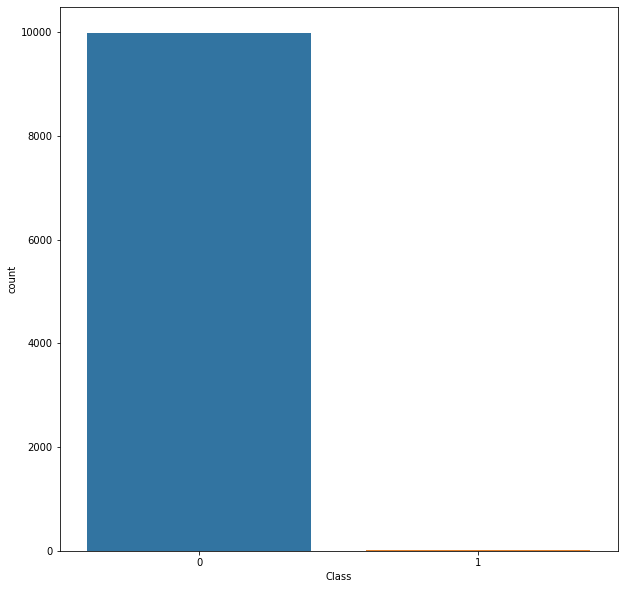

In [61]:
sns.countplot(df["Class"]); # Target variable distribution
print(df.Class.value_counts())

In [64]:
count_classes = pd.value_counts(df['Class'], sort = True)
print((count_classes/df.shape[0])*100)

0    99.8
1     0.2
Name: Class, dtype: float64


In [65]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

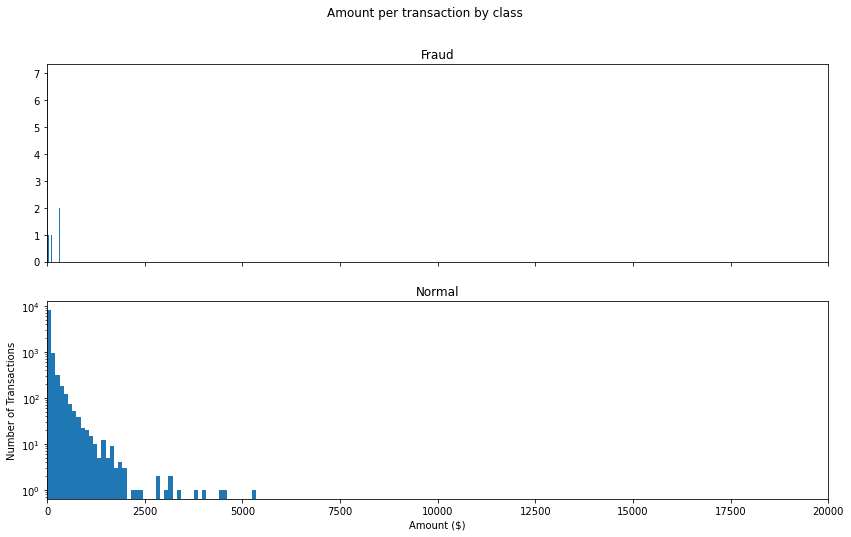

In [66]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14,8))
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

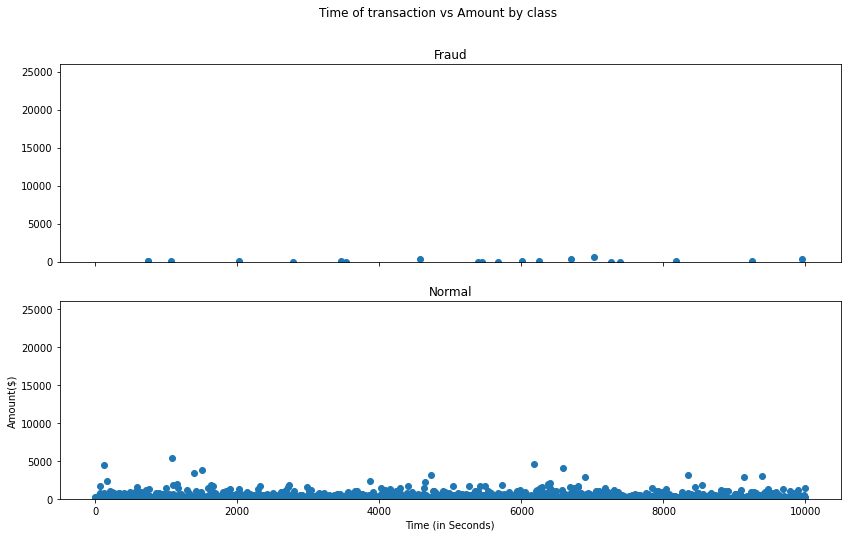

In [67]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14,8))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.id, frauds.Amount)
ax1.set_title('Fraud')
ax1.set(ylim=(0, 26000))

ax2.scatter(normal.id, normal.Amount)
ax2.set_title('Normal')
ax2.set(ylim=(0, 26000))

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount($)')
plt.show()

In [68]:
data = df.drop(['id'], axis=1)

In [69]:
#tf.random.set_seed(143)

np.random.seed(143)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 123)

print(f"The class distribution of train data is \n{(X_train['Class'].value_counts()/X_train.shape[0])*100}\n")
print(f"The class distribution of test data is \n{(X_test['Class'].value_counts()/X_test.shape[0])*100}")

The class distribution of train data is 
0    99.7875
1     0.2125
Name: Class, dtype: float64

The class distribution of test data is 
0    99.85
1     0.15
Name: Class, dtype: float64


In [71]:
## We are not dropping of target column from train dataset as lI would later need it to filter non fraudalent data

y_test = X_test['Class'] 
X_test = X_test.drop(['Class'], axis=1)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 9)
(2000, 8)
(2000,)


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train['Amount'].values.reshape(-1, 1))

X_train['Amount'] = scaler.transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

In [73]:
print(X_train.head(3))
print('\n----------------------------------------------------------------------------------')
print(X_test.head(3))

      normalized_total_spent_last_24_hours  normalized_merchant_fraud_risk  \
9216                             -0.661081                        1.097871   
7324                              2.110176                       -0.148474   
918                               0.000708                        0.635513   

      normalized_time_since_last_transaction  normalized_average_transaction  \
9216                                0.826405                        0.973737   
7324                               -1.377028                        0.264841   
918                                 0.798978                        1.738429   

      normalized_days_till_expiration  normalized_transaction_time  \
9216                        -0.451982                    -0.702818   
7324                         0.094461                    -0.844695   
918                          0.777001                     2.050335   

      normalized_change_in_merchant_sales    Amount  Class  
9216                    

In [74]:
X_train_NF = X_train[X_train['Class'] == 0] # non-fraud
X_train_NF = X_train_NF.drop(['Class'], axis=1)

X_train_NF = X_train_NF.values

print(X_train_NF.shape)
print(X_test.shape)
print(y_test.shape)

(7983, 8)
(2000, 8)
(2000,)


In [75]:
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
input_dim = X_train_NF.shape[1]

encoding_dim = 14

In [77]:
from tensorflow.keras.regularizers import l1

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="relu",)(input_layer) #activity_regularizer=l1(10e-5)
encoder = Dropout(0.1)(encoder)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dropout(0.1)(decoder)

decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [78]:
autoencoder.compile(optimizer = 'adam', 
                    loss = 'mean_squared_error', 
                    metrics = ['accuracy'])

hist = autoencoder.fit(X_train_NF, 
                       X_train_NF, 
                       epochs = 100, 
                       batch_size = 128, 
                       shuffle = True, 
                       validation_split = 0.3, 
                       verbose = 1)

Train on 5588 samples, validate on 2395 samples
Epoch 1/100
5588/5588 [==============================] - 0s 87us/sample - loss: 1.7609 - accuracy: 0.2419 - val_loss: 1.8735 - val_accuracy: 0.3432
Epoch 2/100
5588/5588 [==============================] - 0s 19us/sample - loss: 1.6150 - accuracy: 0.3380 - val_loss: 1.7215 - val_accuracy: 0.4150
Epoch 3/100
5588/5588 [==============================] - 0s 15us/sample - loss: 1.5007 - accuracy: 0.3869 - val_loss: 1.5602 - val_accuracy: 0.4722
Epoch 4/100
5588/5588 [==============================] - 0s 17us/sample - loss: 1.3754 - accuracy: 0.4304 - val_loss: 1.3804 - val_accuracy: 0.5161
Epoch 5/100
5588/5588 [==============================] - 0s 15us/sample - loss: 1.2283 - accuracy: 0.4782 - val_loss: 1.1633 - val_accuracy: 0.5641
Epoch 6/100
5588/5588 [==============================] - 0s 17us/sample - loss: 1.1154 - accuracy: 0.5249 - val_loss: 0.9910 - val_accuracy: 0.6271
Epoch 7/100
5588/5588 [==============================] - 0s 15us

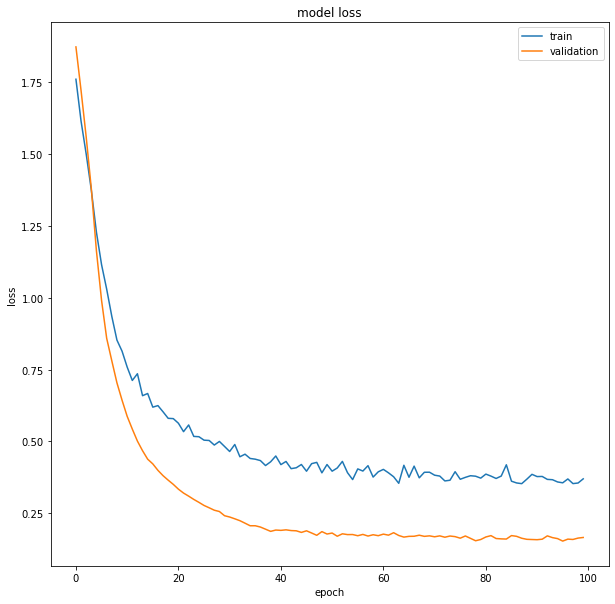

In [79]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right');

In [80]:
test_pred = autoencoder.predict(X_test.values) #Obtaining predictions for non fraud records

In [81]:
test_errors = np.mean(np.square(np.abs(X_test - test_pred)), axis = 1)  #Computing reconstruction error on non-fraud data

test_errors[0:5]  

2656    0.226726
445     0.107100
9505    0.038605
332     0.126588
4168    0.041673
dtype: float64

In [82]:
mse = np.mean(np.power(X_test - test_pred, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [83]:
#Experimentation to fix a threshold for classification of a transaction into fraud or non-fraud

print(f"The test errors shape is {test_errors.shape}\n------------------------")
print(f"The test errors are {test_errors}\n------------------------")

train_pred = autoencoder.predict(X_train_NF)
mean_train_error = np.mean(np.square(np.abs(train_pred - X_train_NF)), axis=1).mean()

print(f"\nThe mean train recon value is {mean_train_error}")


The test errors shape is (2000,)
------------------------
The test errors are 2656    0.226726
445     0.107100
9505    0.038605
332     0.126588
4168    0.041673
          ...   
8018    0.083845
6463    0.267400
2883    0.007793
7895    0.041727
620     0.037616
Length: 2000, dtype: float64
------------------------

The mean train recon value is 0.1409825708664655


In [84]:
from sklearn.metrics import f1_score,confusion_matrix, classification_report

scores_f1 = []
thres = []

th = 0
for i in range(200):
    th+=0.1
    fraud = list((test_errors > mean_train_error+th))
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_train_error)

In [85]:
print(type(test_errors))
print(test_errors.shape)
print(y_test.shape)
print(type(y_test))
print(type(fraud))

<class 'pandas.core.series.Series'>
(2000,)
(2000,)
<class 'pandas.core.series.Series'>
<class 'list'>


In [86]:
np.unique(fraud)

array([False,  True])

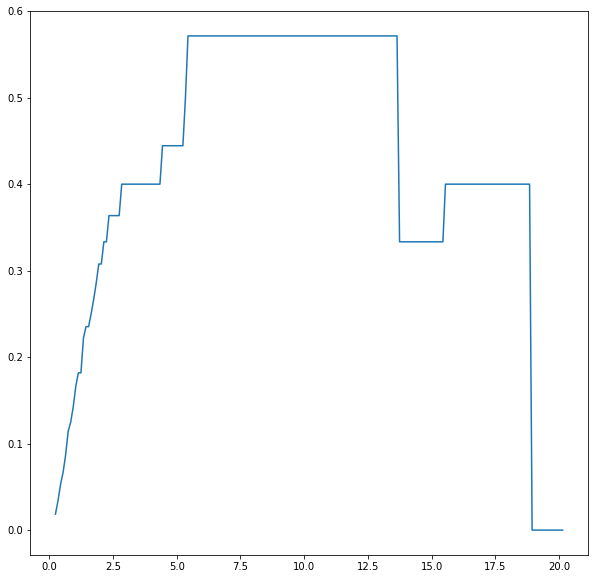

In [87]:
plt.plot(thres, scores_f1)

In [88]:
print(thres[np.array(scores_f1).argmax()])

fraud1 = (test_errors > thres[np.array(scores_f1).argmax()])

print(confusion_matrix(y_test, fraud1))

print(classification_report(y_test, fraud1))

5.4409825708664625
[[1995    2]
 [   1    2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.50      0.67      0.57         3

    accuracy                           1.00      2000
   macro avg       0.75      0.83      0.79      2000
weighted avg       1.00      1.00      1.00      2000



In [89]:
threshold = thres[np.array(scores_f1).argmax()]
print(threshold)

5.4409825708664625


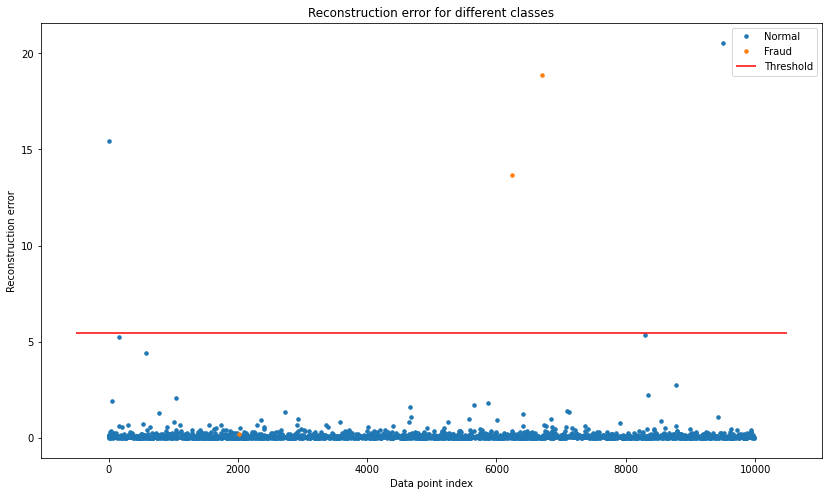

In [90]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))

for name, group in groups:
    ax.plot(tuple(group.index), tuple(group.reconstruction_error), marker='o', ms=3.5, linestyle='',
           label= "Fraud" if name == 1 else "Normal")#
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [92]:
LABELS = ["Normal", "Fraud"]

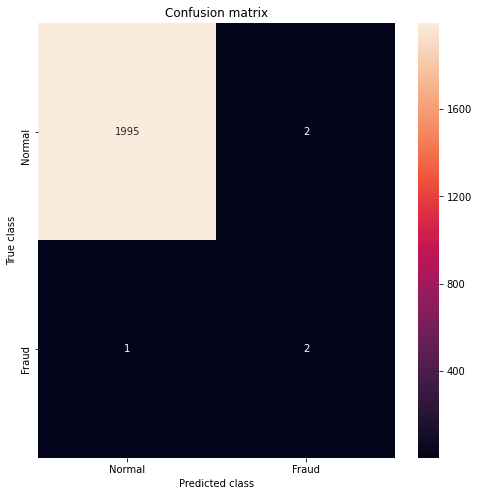

In [93]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()